In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
plt.style.use("ggplot")

In [2]:
def Dynamical_cluster(X,n_clusters=2):
    clustering = KMeans(n_clusters=n_clusters,
                        init='k-means++', 
                        n_init=10, # 获取初始簇中心的更迭次数，
                        max_iter=300, 
                        tol=0.0001, 
                        random_state=None, #随机生成簇中心的状态条件
                        n_jobs=1,)
    result = clustering.fit(X)
    centroids = result.cluster_centers_ #获取聚类中心
    inertia = result.inertia_ # 获取聚类准则的总和
    return result.labels_,centroids,inertia

In [3]:
def Agglomerative_cluster(X,n_clusters):
    clustering = AgglomerativeClustering(affinity='euclidean', # euclidean,l1,l2,manhattan,cosine,precomputed
                                         linkage='ward', # ward,complete,average,single
                                         n_clusters=n_clusters,)
    result = clustering.fit(X)
    return result.labels_

In [4]:
def plot_data(X,labels1,labels2):
    fig1 = plt.figure()
    ax = fig1.add_subplot(1,1,1)
    ax.scatter(X[:,0],X[:,1],
               #label='cluster%d'%labels,
               linewidths=0.01,
               marker = '.',
               alpha=0.9,
               c=labels1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Agglomerative_cluster')
    plt.show()
    
    fig2 = plt.figure()
    ax = fig2.add_subplot(1,1,1)
    ax.scatter(X[:,0],X[:,1],
               #label='cluster%d'%labels,
               linewidths=0.1,
               marker = '.',
               alpha=0.9,
               c=labels2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Dynamical_cluster')
    plt.show()

In [5]:
X_df = pd.read_csv('MoiveSpssl.csv')
# X_df

In [6]:
X = np.array(X_df)

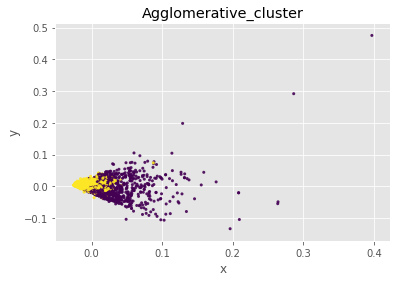

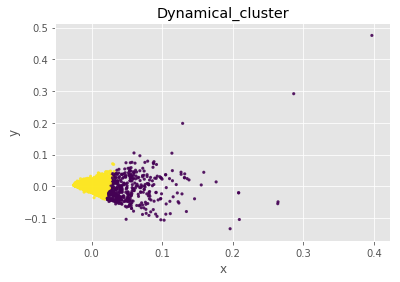

In [7]:
X_1 = preprocessing.normalize(X.transpose(), norm='l2').transpose()
k = 2
lables1 = Agglomerative_cluster(X_1,k)
[lables2,_,_] = Dynamical_cluster(X_1,k)
X_1 = PCA(n_components=2).fit_transform(X_1)
plot_data(X_1,lables1,lables2)

In [8]:
#X_df
X_df['lables1'] = lables1
X_df['lables2'] = lables2
# X_df[X_df['lables'] == 1]
#X_df[X_df['lables1'] == lable]

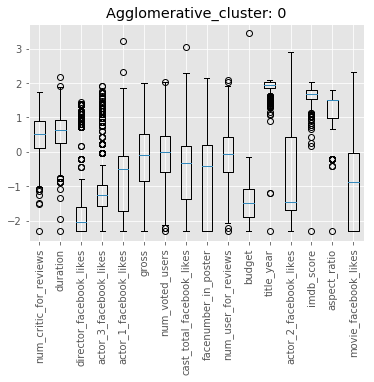

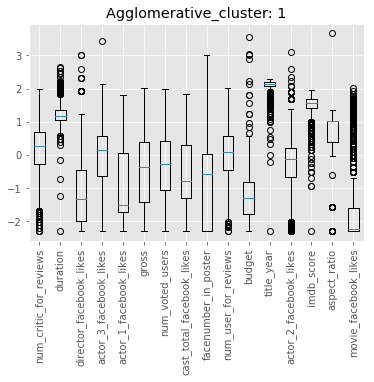

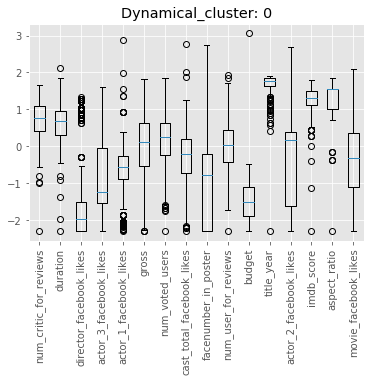

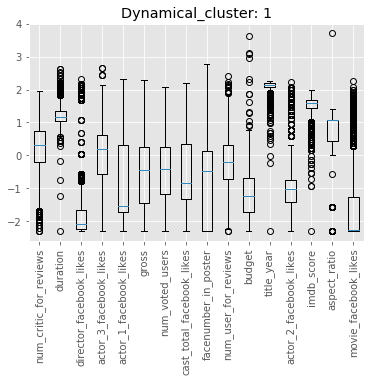

In [9]:
zscore = lambda x: (x-x.mean())/x.std()
for lable in set(lables1):
    plt.figure()
    #plt.boxplot(np.log(X_df[X_df['lables1'] == lable]).values,labels=X_df.columns)
    #print(X_df[X_df['lables1'] == lable])
    temp = X_df[X_df['lables1'] == lable].apply(lambda x: (x-x.min())/x.std()+0.1, axis=0).apply(np.log)
    temp.drop(columns=['lables1','lables2'],inplace=True)
    plt.boxplot(temp.values,labels=temp.columns)    
    plt.title('Agglomerative_cluster: %d'%lable)
    plt.xticks(rotation=90)
plt.show()

for lable in set(lables2):
    plt.figure()
    #plt.boxplot(np.log(X_df[X_df['lables2'] == lable]).values,labels=X_df.columns)
    temp = X_df[X_df['lables2'] == lable].apply(lambda x: (x-x.min())/x.std()+0.1, axis=0).apply(np.log)
    temp.drop(columns=['lables1','lables2'],inplace=True)
    plt.boxplot(temp.values,labels=temp.columns)    
    plt.title('Dynamical_cluster: %d'%lable)Dynamical_clusterDynamical_cluster
    plt.xticks(rotation=90)
plt.show()

0
1


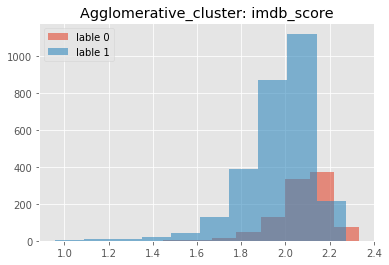

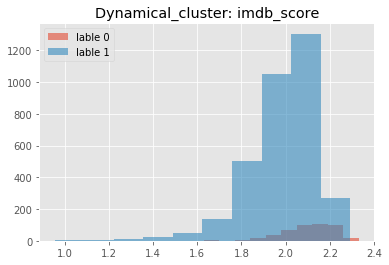

In [27]:
for lable in set(lables1):
    plt.hist(np.log(X_df[X_df['lables1'] == lable]['imdb_score']+1),alpha=0.6)
    plt.legend(['lable 0','lable 1'])
    print(lable)
    plt.title('Agglomerative_cluster: imdb_score')#movie_facebook_likes,imdb_score
plt.show()

for lable in set(lables2):
    plt.hist(np.log(X_df[X_df['lables2'] == lable]['imdb_score']+1),alpha=0.6)
    plt.legend(['lable 0','lable 1'])
    plt.title('Dynamical_cluster: imdb_score')
plt.show()

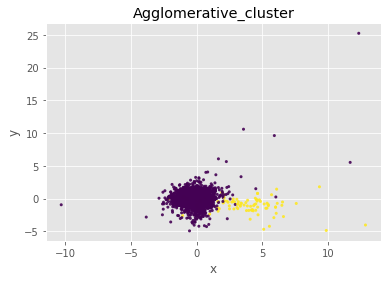

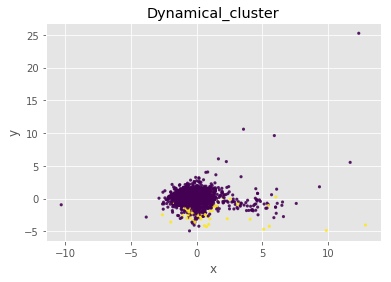

In [11]:
X_2 = PCA(n_components=None,whiten=True).fit_transform(X)
k = 2
lables1 = Agglomerative_cluster(X_2,k)
[lables2,_,_] = Dynamical_cluster(X_2,k)
X_2 = PCA(n_components=2).fit_transform(X_2)
plot_data(X_2,lables1,lables2)

# AgglomerativeClustering
## 参数
n_clusters：一个整数，指定分类簇的数量  
connectivity：一个数组或者可调用对象或者None，用于指定连接矩阵  
affinity：一个字符串或者可调用对象，用于计算距离。 可以为：’euclidean’，’l1’，’l2’，’mantattan’，’cosine’，’precomputed’，如果linkage=’ward’，则affinity必须为’euclidean’    
memory：用于缓存输出的结果，默认为不缓存    
n_components：在 v-0.18中移除  
compute_full_tree：通常当训练了n_clusters后，训练过程就会停止，但是如果compute_full_tree=True，则会继续训练从而生成一颗完整的树  
linkage：一个字符串，用于指定链接算法   
    ‘ward’：单链接single-linkage，采用dmindmin  
    ‘complete’：全链接complete-linkage算法，采用dmaxdmax  
    ‘average’：均连接average-linkage算法，采用davgdavg  
pooling_func：一个可调用对象，它的输入是一组特征的值，输出是一个数  
## 属性
labels：每个样本的簇标标记  
n_leaves_：分层树的叶节点数量  
n_components：连接图中连通分量的估计值  
children：一个数组，给出了每个非节点数量  

https://blog.csdn.net/Haiyang_Duan/article/details/77995665   
https://blog.csdn.net/sinat_26917383/article/details/70240628